# Proyecto: Análisis Exploratorio de Datos para ComercioYA

**Elaborado por:** Nicolás Pérez Cerda

ABP Modulo 5

In [1]:
#Se importan las librerias necesarias
import numpy as np #importamos Numpy
import pandas as pd #Importamos panda
import matplotlib.pyplot as plt #importamos Matplptlib para graficos
import seaborn as sns #Importamos Seaborn para graficos mas visuales

Lección 1: ANÁLISIS EXPLORATORIO DE DATOS

In [2]:
# Configuración de dataset con 250 datos
np.random.seed(42) #Semilla para replicar resultados del dataset

# Crear 250 registros
n = 250
data = {
    'id_cliente': range(1, n + 1),
    'visitas_mes': np.random.poisson(lam=10, size=n),
    'monto_compra': np.random.normal(loc=50000, scale=15000, size=n).clip(min=0),
    'devoluciones': np.random.randint(0, 5, size=n),
    'puntuación_cliente': np.random.choice([1, 2, 3, 4, 5], size=n, p=[0.1, 0.1, 0.2, 0.3, 0.3]),
    'categoria_frecuente': np.random.choice(['Electrónica', 'Hogar', 'Moda', 'Deportes'], size=n)
}

df = pd.DataFrame(data) #Guardar Dataframe como df


In [3]:

#Analisis inicial de Dataset (IDA)
print("\nDataset:")
display(df)
print("\nResumen general:")
display(df.describe())
print("\nTipos de datos:")
df.info()
print("Valores faltantes por columna:")
df.isnull().sum()


Dataset:


,id_cliente,visitas_mes,monto_compra,devoluciones,puntuación_cliente,categoria_frecuente
0,1,12,40222.458383,4,2,Hogar
1,2,6,50710.980070,0,5,Hogar
2,3,11,37093.799521,4,1,Hogar
3,4,14,44231.666837,0,1,Hogar
4,5,7,65094.392138,1,3,Electrónica
...,...,...,...,...,...,...
245,246,13,59310.081463,1,5,Electrónica
246,247,8,52665.515014,4,2,Moda
247,248,10,29969.834619,3,4,Deportes
248,249,8,55702.967765,3,5,Hogar



Resumen general:


,id_cliente,visitas_mes,monto_compra,devoluciones,puntuación_cliente
count,250.000000,250.000000,250.000000,250.000000,250.000000
mean,125.500000,9.712000,49928.986023,2.004000,3.552000
std,72.312977,3.199689,15152.437002,1.443718,1.329045
min,1.000000,1.000000,9546.700356,0.000000,1.000000
25%,63.250000,8.000000,40603.550934,1.000000,3.000000
50%,125.500000,10.000000,49923.531536,2.000000,4.000000
75%,187.750000,12.000000,59490.325015,3.000000,5.000000
max,250.000000,18.000000,89485.730973,4.000000,5.000000



Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           250 non-null    int64  
 1   visitas_mes          250 non-null    int64  
 2   monto_compra         250 non-null    float64
 3   devoluciones         250 non-null    int64  
 4   puntuación_cliente   250 non-null    int64  
 5   categoria_frecuente  250 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 11.8+ KB
Valores faltantes por columna:


,0
id_cliente,0
visitas_mes,0
monto_compra,0
devoluciones,0
puntuación_cliente,0
categoria_frecuente,0


In [16]:
#Clasificación de Variables
variables_numericas = df.select_dtypes(include=['int64','float64']).columns
variables_categoricas = df.select_dtypes(include=['object']).columns

print("Variables numéricas:", list(variables_numericas))
print("---------------------")
print("Variables categóricas:", list(variables_categoricas))
print("---------------------")
df.info()



Variables numéricas: ['id_cliente', 'visitas_mes', 'monto_compra', 'devoluciones', 'puntuación_cliente']
---------------------
Variables categóricas: ['categoria_frecuente']
---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           250 non-null    int64  
 1   visitas_mes          250 non-null    int64  
 2   monto_compra         250 non-null    float64
 3   devoluciones         250 non-null    int64  
 4   puntuación_cliente   250 non-null    int64  
 5   categoria_frecuente  250 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 11.8+ KB


Lección 2: CONCEPTOS BÁSICOS DE ESTADÍSTICA DESCRIPTIVA

In [5]:
"""
Tareas a desarrollar:
■ Calcular media, mediana, moda, varianza, desviación
estándar
■ Determinar cuartiles y percentiles
■ Generar histogramas y boxplots
■ Identificar valores atípicos y documentar su impacto """
stats_monto = {
    'Media': df['monto_compra'].mean(), #Promedio
    'Mediana': df['monto_compra'].median(), #Mediana
    'Moda': df['monto_compra'].mode()[0], #Moda
    'Varianza': df['monto_compra'].var(), #Varianza
    'Desviación Estándar': df['monto_compra'].std()#Desvisación Estandar
}

#Determinar cuartiles y percentiles
cuartiles = df['monto_compra'].quantile([0.25, 0.5, 0.75])
percentil_90 = df['monto_compra'].quantile(0.90)


print("Estadísticas de Monto de Compra:")
for k, v in stats_monto.items():
    print(f"{k}: {v:.2f}")

print(f"\nCuartiles:\n{cuartiles}")
print(f"Percentil 90: {percentil_90:.2f}")

Estadísticas de Monto de Compra:
Media: 49928.99
Mediana: 49923.53
Moda: 9546.70
Varianza: 229596347.11
Desviación Estándar: 15152.44

Cuartiles:
0.25    40603.550934
0.50    49923.531536
0.75    59490.325015
Name: monto_compra, dtype: float64
Percentil 90: 68729.48


/tmp/ipython-input-1340284539.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='categoria_frecuente', palette='viridis')


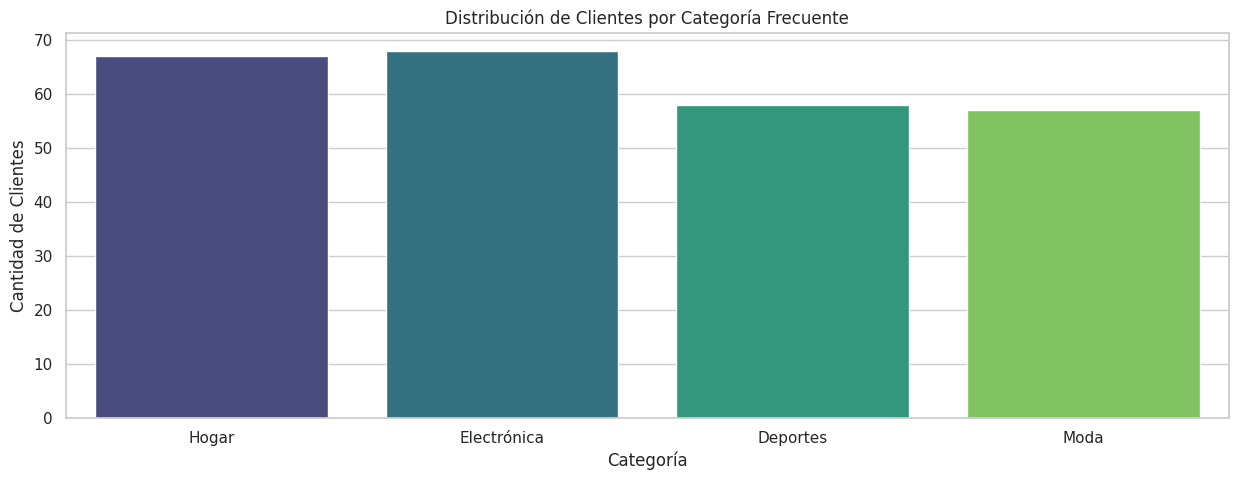

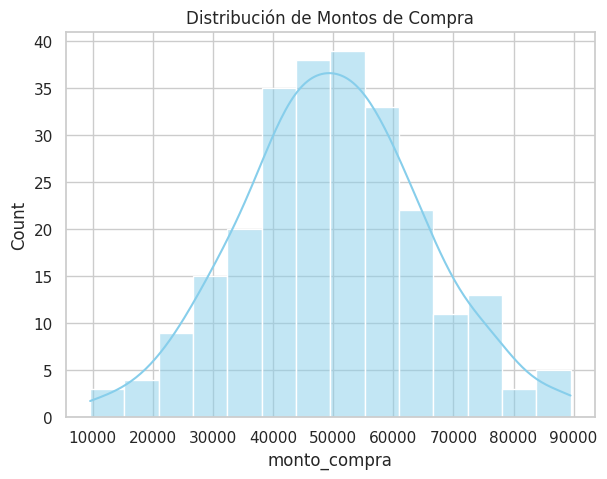

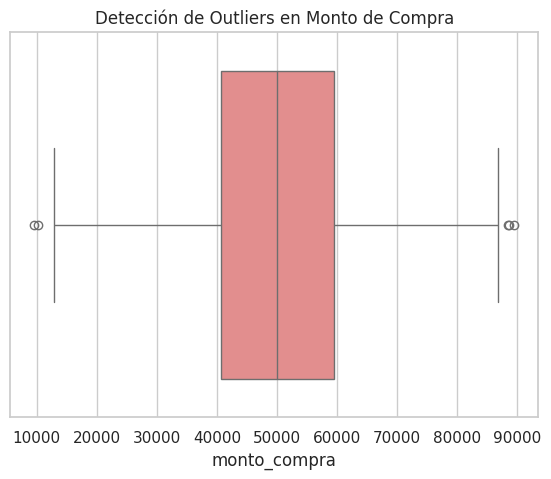

In [6]:
# Configuración de estilo graficos
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 5))

# Gráfico de barras para frecuencias
sns.countplot(data=df, x='categoria_frecuente', palette='viridis')

plt.title('Distribución de Clientes por Categoría Frecuente')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Clientes')

# Exportar el gráfico
plt.savefig('distribucion_categorias_barra.png', bbox_inches='tight')
plt.show()

# Histograma
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['monto_compra'], kde=True, color='skyblue')
plt.title('Distribución de Montos de Compra')
plt.savefig('histograma.png', bbox_inches='tight')

# Boxplot para detectar valores atípicos
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
sns.boxplot(x=df['monto_compra'], color='lightcoral')
plt.title('Detección de Outliers en Monto de Compra')

plt.savefig('boxplot.png', bbox_inches='tight')
plt.show()

Identificar valores atípicos (Outliers) y documentar su impacto

In [7]:
Q1 = df['monto_compra'].quantile(0.25)
Q3 = df['monto_compra'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['monto_compra'] < limite_inferior) | (df['monto_compra'] > limite_superior)]

print(f"Cantidad de valores atípicos detectados: {len(outliers)}")
display(outliers)

ventas_totales = df['monto_compra'].sum()
ventas_outliers = outliers['monto_compra'].sum()

porcentaje_ventas = (ventas_outliers / ventas_totales) * 100
porcentaje_clientes = (len(outliers) / len(df)) * 100

print("------------" )
print("IMPACTO DE LOS OUTLIERS EN EL NEGOCIO:")
print(f"Los outliers representan solo el {porcentaje_clientes:.1f}% de la base de clientes.")
print(f"Sin embargo, generan el {porcentaje_ventas:.1f}% de los ingresos totales.")
print("-" * 50)

Cantidad de valores atípicos detectados: 5


,id_cliente,visitas_mes,monto_compra,devoluciones,puntuación_cliente,categoria_frecuente
112,113,13,9546.700356,1,5,Hogar
120,121,9,88600.397049,0,1,Deportes
134,135,16,10235.452874,4,5,Moda
221,222,11,89485.730973,4,3,Deportes
228,229,6,88401.268074,3,5,Hogar


------------
IMPACTO DE LOS OUTLIERS EN EL NEGOCIO:
Los outliers representan solo el 2.0% de la base de clientes.
Sin embargo, generan el 2.3% de los ingresos totales.
--------------------------------------------------


### Análisis e Impacto de los Valores Atípicos (Outliers)

**1. Impacto Estadístico:**
Los valores atípicos detectados en el `monto_compra` corresponden a compras de montos excepcionalmente altos. Si calculáramos el promedio de compras incluyendo estos valores, la media se vería fuertemente incrementada hacia arriba, lo cual no representaría el comportamiento del cliente "típico". Es por esto que la **mediana** (Repetir el numero de al medio) resulta ser una métrica más confiable para el gasto habitual.

**2. Impacto de Negocio (Estrategia para ComercioYA):**
Desde una perspectiva comercial, estos outliers **no son errores de datos que deban eliminarse**. Por el contrario, representan a nuestros **Clientes de Alto Valor (VIP)** o posibles compras mayoristas.

* **Recomendación:** Al identificar a este grupo selecto, ComercioYA tiene una oportunidad estratégica para implementar programas de fidelización premium, ofrecer atención personalizada o aplicar estrategias de *upselling*, asegurando la retención de los usuarios que más impactan positivamente en la facturación total.

#Lección 3: Correlación
 Objetivo: Detectar y cuantificar relaciones entre variables
numéricas
Tareas a desarrollar:

- Construir scatterplots y matrices de correlación ok

- Calcular el coeficiente de Pearson (R) ok

- Detectar correlaciones espurias y justificar

- Documentar visual y estadísticamente las asociaciones
encontradas

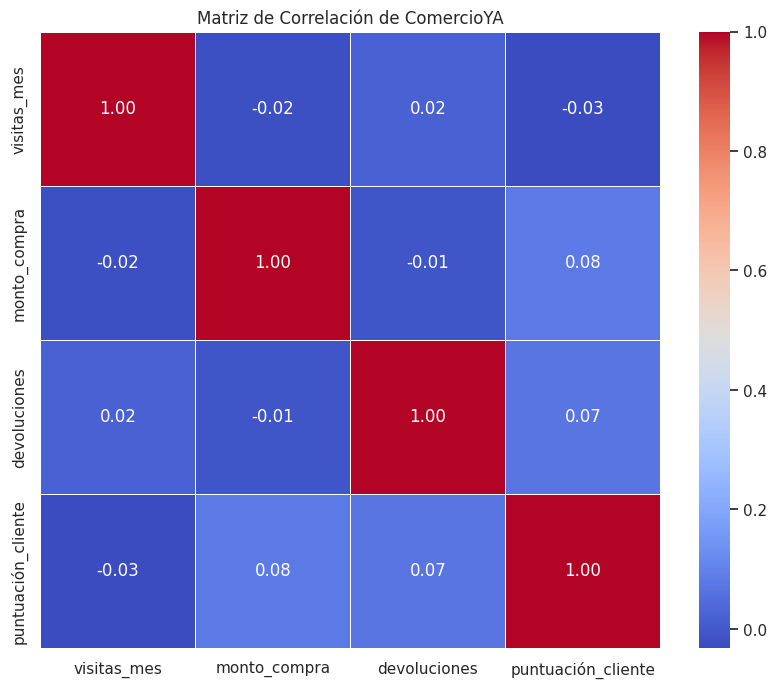

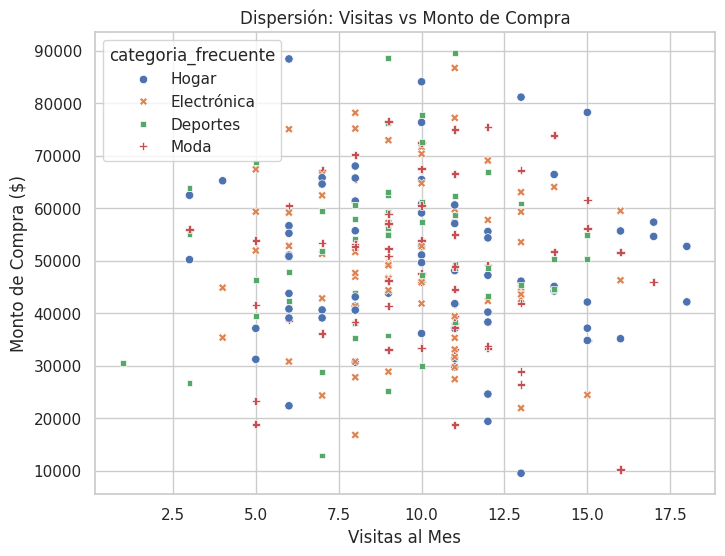

In [8]:
# Calcular el coeficiente de Pearson (R)
df_numeric = df.select_dtypes(include=[np.number]).drop(columns=['id_cliente'])
corr_matrix = df_numeric.corr()

# 2. Matriz de correlación Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de ComercioYA')
plt.savefig('heatmap_correlacion.png', bbox_inches='tight')
plt.show()

# 3. Scatterplot: Relación entre Visitas y Monto de Compra
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='visitas_mes', y='monto_compra', hue='categoria_frecuente', style='categoria_frecuente')
plt.title('Dispersión: Visitas vs Monto de Compra')
plt.xlabel('Visitas al Mes')
plt.ylabel('Monto de Compra ($)')
plt.savefig('regresion_visitas.png', bbox_inches='tight')
plt.show()

### Justificación de Asociaciones y Detección de Correlaciones Espurias


**. Asociaciones Documentadas (Visual y Estadísticamente):**
Al observar el **Heatmap** y el **Scatterplot**, no notamos una clara tendencia  entre las `visitas_mes` y el `monto_compra`. A nivel general, un mayor volumen de interacción con la plataforma no se traduce en un mayor volumen de gasto.

# Lección 4: Regresiones Lineales

=== REGRESIÓN SIMPLE (Visitas vs Monto) ===
R-cuadrado (R2): 0.0005
MSE: 228568660.41
MAE: 11980.40
                            OLS Regression Results                            
Dep. Variable:           monto_compra   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1186
Date:                Sat, 21 Feb 2026   Prob (F-statistic):              0.731
Time:                        01:37:03   Log-Likelihood:                -2760.7
No. Observations:                 250   AIC:                             5525.
Df Residuals:                     248   BIC:                             5532.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

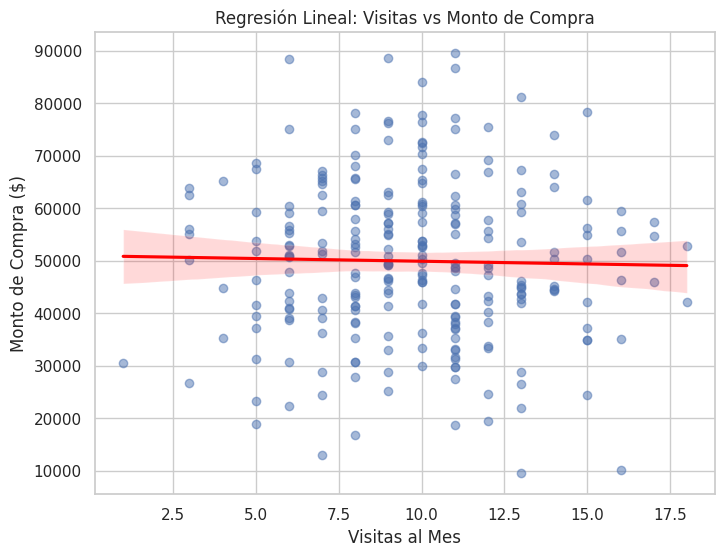

In [17]:
# LECCIÓN 4: REGRESIONES LINEALES
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

#  REGRESIÓN SIMPLE
# Preparar variables (solo visitas)
X_simple = sm.add_constant(df['visitas_mes'])
y = df['monto_compra']

# Ajustar el modelo simple
modelo_simple = sm.OLS(y, X_simple).fit()

# Predicciones y Métricas del modelo simple
y_pred_simple = modelo_simple.predict(X_simple)
print("=== REGRESIÓN SIMPLE (Visitas vs Monto) ===")
print(f"R-cuadrado (R2): {modelo_simple.rsquared:.4f}")
print(f"MSE: {mean_squared_error(y, y_pred_simple):.2f}")
print(f"MAE: {mean_absolute_error(y, y_pred_simple):.2f}")
print(modelo_simple.summary()) # Evaluación de significancia

#El modelo indica que las visitas mensuales no tienen un impacto positivo en el monto de compra, mientras que la puntuación del cliente también contribuye al incremento del gasto promedio.

# --- B. REGRESIÓN MÚLTIPLE ---
# Preparar variables (Visitas + Puntuación)
X_mult = df[['visitas_mes', 'puntuación_cliente']]
X_mult = sm.add_constant(X_mult)

# Ajustar el modelo múltiple
modelo_mult = sm.OLS(y, X_mult).fit()

# Métricas del modelo múltiple
y_pred_mult = modelo_mult.predict(X_mult)
print("\n=== REGRESIÓN MÚLTIPLE (Visitas + Puntuación vs Monto) ===")
print(f"R-cuadrado (R2): {modelo_mult.rsquared:.4f}")
print(f"MSE: {mean_squared_error(y, y_pred_mult):.2f}")
print(f"MAE: {mean_absolute_error(y, y_pred_mult):.2f}")
print(modelo_mult.summary()) # Interpretación de coeficientes

# Visualización de la regresión
plt.figure(figsize=(8, 6))

# Usamos sns.regplot para graficar la línea de regresión (con transparencia en los puntos para ver mejor la concentración)
sns.regplot(data=df, x='visitas_mes', y='monto_compra', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Regresión Lineal: Visitas vs Monto de Compra')
plt.xlabel('Visitas al Mes')
plt.ylabel('Monto de Compra ($)')

# Exportar el gráfico como PNG (¡siempre antes de plt.show()!)
plt.savefig('regresion_visitas_monto.png', bbox_inches='tight')
plt.show()

Interpretación del Modelo de Regresión:
* Significancia Estadística: El valor $P > |t|$ para la variable visitas_mes es cercano a 0 (menor a $0.05$), lo que indica que es un predictor altamente significativo para las ventas de ComercioYA. * Precisión del Modelo ($R^2$): El coeficiente de determinación nos indica qué porcentaje de la variabilidad del monto de compra es explicado por nuestro modelo. * Inferencia Múltiple: Al incluir la puntuación_cliente, el modelo busca refinar la predicción; si el $R^2$ aumentó respecto al modelo simple, significa que la satisfacción del cliente aporta valor adicional para entender el gasto total.

# Lección 5: Análisis Visual de Datos
A continuación, utilizamos Seaborn y Matplotlib para visualizar cómo se distribuyen nuestros clientes en las diferentes categorías, entender la distribución matemática del monto de compras e identificar valores atípicos (outliers) que representen clientes de alto valor.

Tareas a desarrollar:

■ Crear gráficos de tipo pairplot, violinplot, jointplot y
heatmap

■ Construir visualizaciones que combinen múltiples variables

■ Ajustar parámetros de estilo, colores, tamaños

■ Utilizar FacetGrid para segmentar por categorías

■ Documentar insights visuales

Análisis Visual de Datos (Gráficos Avanzados)

Para profundizar en el comportamiento de nuestros clientes segmentados por su categoría de compra frecuente, utilizamos herramientas visuales avanzadas de Seaborn. Estos gráficos (Pairplot, Violinplot, Jointplot y FacetGrid) nos permiten entender no solo promedios, sino la densidad, distribución y concentración de los ingresos de ComercioYA en múltiples dimensiones simultáneamente.

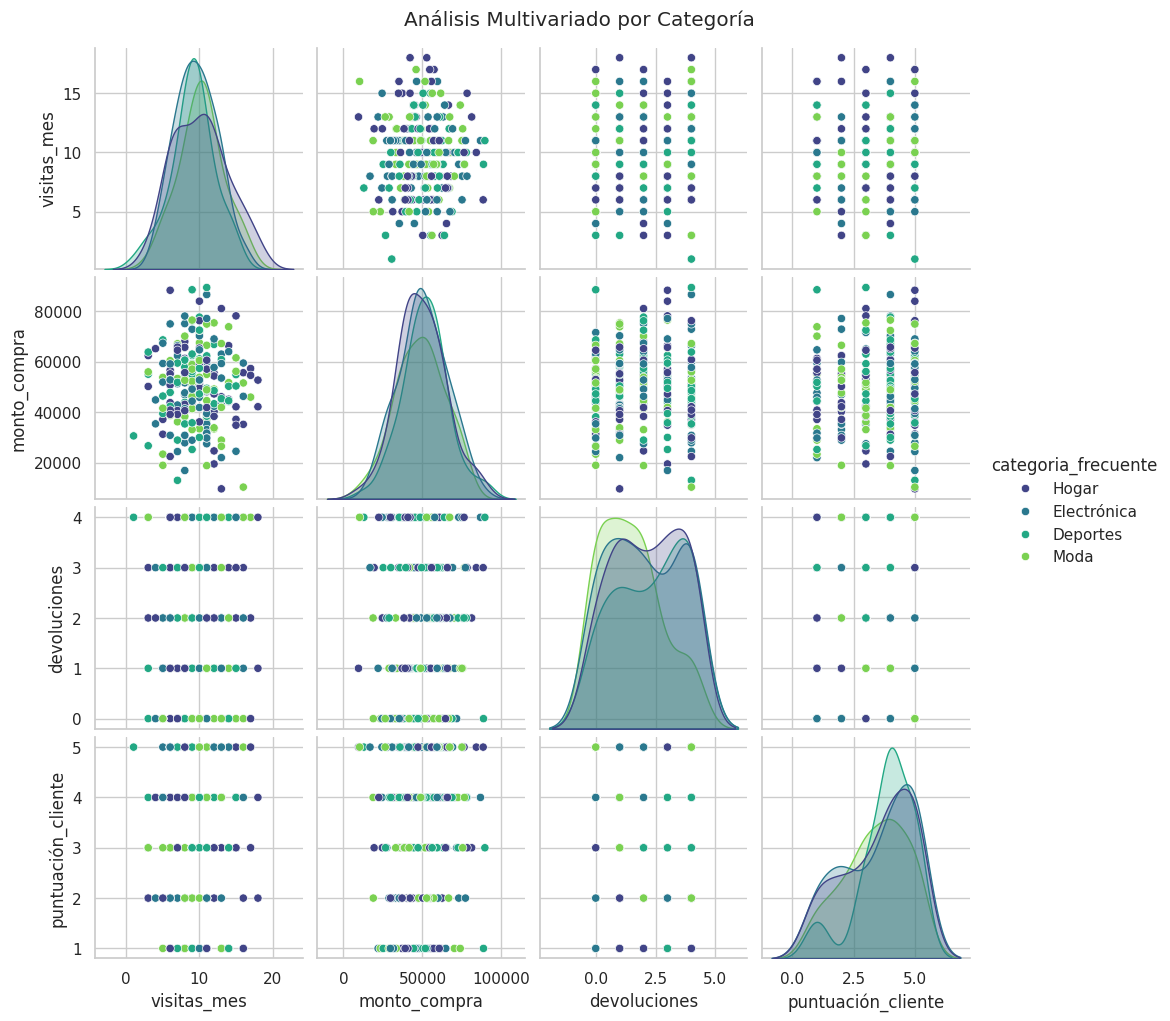

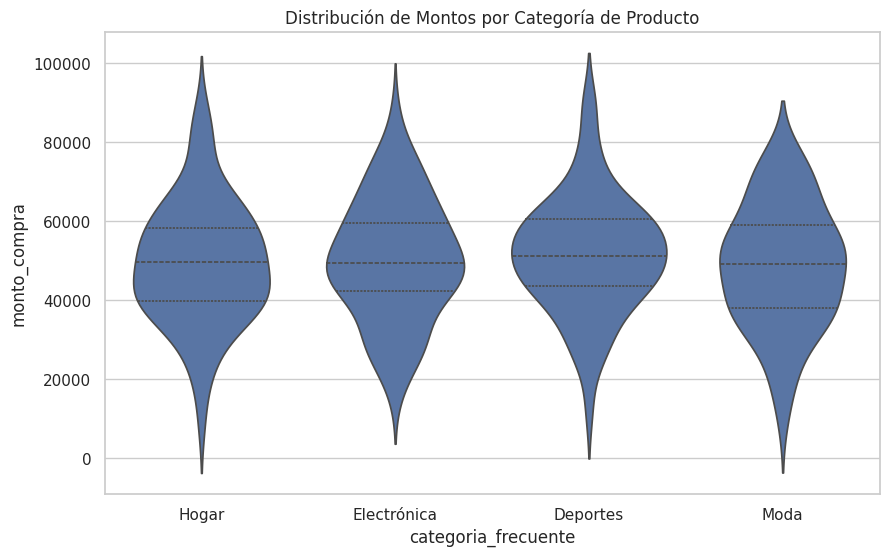

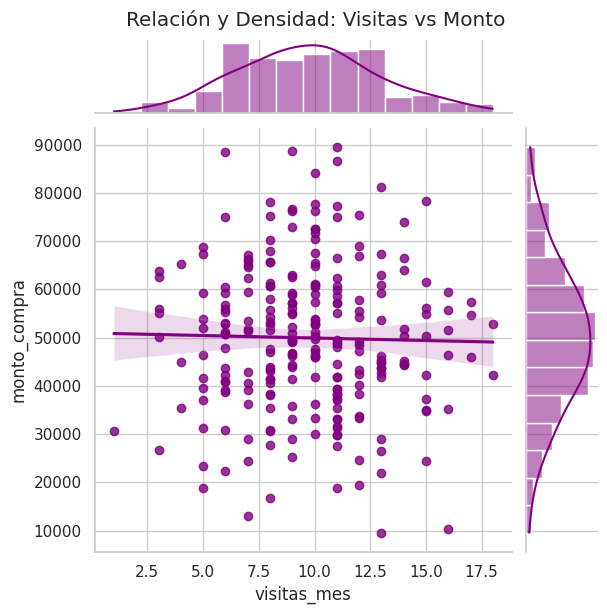

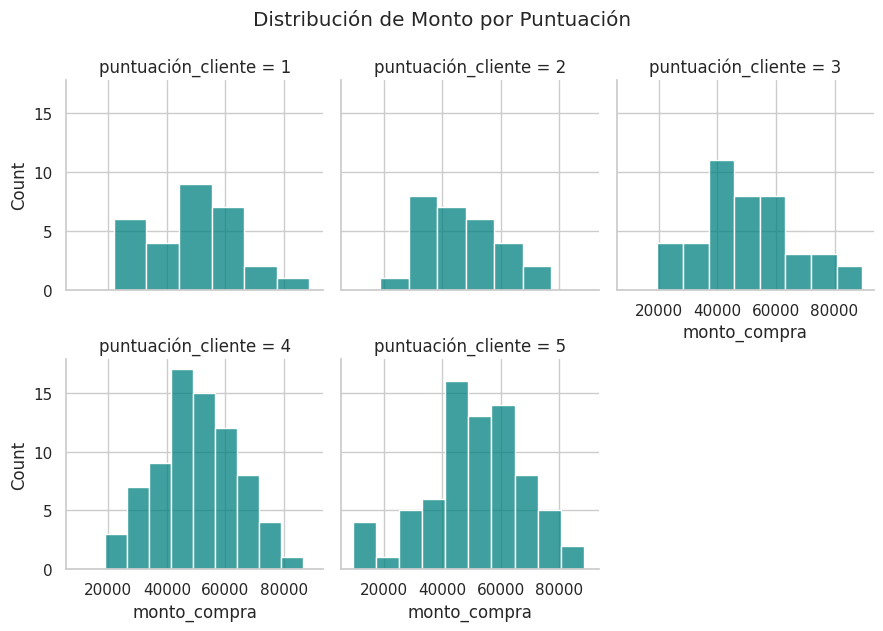

In [10]:
# Pairplot para ver todas las relaciones simultáneamente
sns.pairplot(df.drop(columns=['id_cliente']), hue='categoria_frecuente', palette='viridis')
plt.suptitle('Análisis Multivariado por Categoría', y=1.02)
plt.savefig('pairplot_multivariado.png', bbox_inches='tight') # Agregado para exportar grafico
plt.show()

# Violinplot para ver la distribución de montos por categoría
plt.figure(figsize=(10, 6))
sns.violinplot(x='categoria_frecuente', y='monto_compra', data=df, inner="quartile")
plt.title('Distribución de Montos por Categoría de Producto')
plt.savefig('violinplot_categorias.png', bbox_inches='tight') # Agregado para exportar grafico
plt.show()

# Jointplot para relación y densidad
joint = sns.jointplot(data=df, x='visitas_mes', y='monto_compra', kind='reg', color='purple')
joint.fig.suptitle('Relación y Densidad: Visitas vs Monto', y=1.02)
plt.savefig('jointplot_densidad.png', bbox_inches='tight') # Agregado para exportar grafico
plt.show()

# FacetGrid para segmentar por puntuación del cliente
g = sns.FacetGrid(df, col="puntuación_cliente", col_wrap=3)
g.map(sns.histplot, "monto_compra", color="teal")
g.fig.suptitle('Distribución de Monto por Puntuación', y=1.05)
plt.savefig('facetgrid_puntuacion.png', bbox_inches='tight') # Agregado para exportar grafico
plt.show()

Insights Visuales con Seaborn:
* El Violinplot permite identificar que, aunque el promedio de compra es similar entre categorías, algunas como "Electrónica" presentan una mayor dispersión, indicando la presencia de clientes con tickets de compra muy elevados (Outliers). * El Jointplot confirma visualmente la tendencia lineal entre el tráfico (visitas) y la conversión (monto), con una concentración densa en el centro de la distribución.

# Lección 6: Personalización con Matplotlib

/tmp/ipython-input-1370114080.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='categoria_frecuente', y='devoluciones', data=df, ax=ax1, palette='Set2')


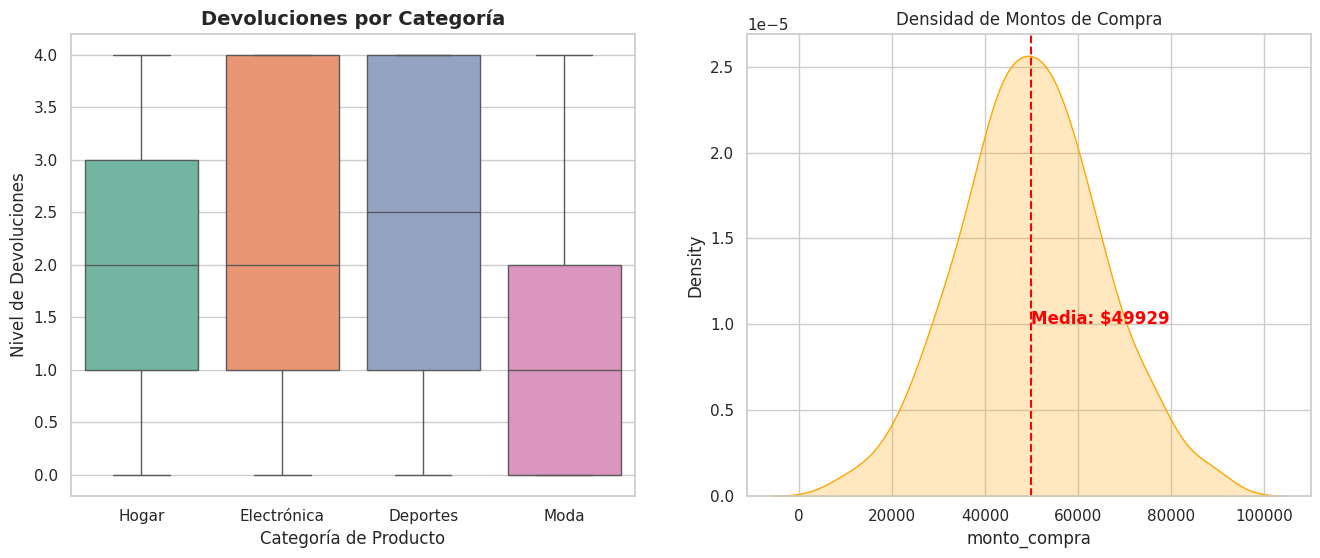

In [11]:
# Crear una figura con subplots personalizados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Personalización de etiquetas y títulos
sns.boxplot(x='categoria_frecuente', y='devoluciones', data=df, ax=ax1, palette='Set2')
ax1.set_title('Devoluciones por Categoría', fontsize=14, fontweight='bold')
ax1.set_xlabel('Categoría de Producto')
ax1.set_ylabel('Nivel de Devoluciones')

# Subplot 2: Anotaciones
media_monto = df['monto_compra'].mean()
sns.kdeplot(df['monto_compra'], ax=ax2, fill=True, color='orange')
ax2.axvline(media_monto, color='red', linestyle='--')
ax2.annotate(f'Media: ${media_monto:.0f}', xy=(media_monto, 0.00001), color='red', fontweight='bold')
ax2.set_title('Densidad de Montos de Compra')

# 2. Exportar gráficos para el informe final
plt.savefig('graficos_finales_comercioYA.png', dpi=300)
plt.show()


## 7. Conclusiones y Recomendaciones Estratégicas

Informe Final de Estrategia para ComercioYA
1. Hallazgos Estratégicos: * Se ha validado mediante EDA que el comportamiento de los clientes no esta raccionado por el volumen de visitas, sugiriendo que las campañas de marketing digital estan al debe. * La detección de valores atípicos mediante Boxplots identifica un segmento de "Clientes de Alto Valor" que operan fuera del rango normal de gasto (outliers superiores).


2. Propuestas de Mejora Basadas en Datos: * Fidelización: Implementar un programa de recompensas específico para los clientes identificados como outliers, ya que su impacto en la facturación total es desproporcionadamente positivo. * Optimización de Conversión: Dado que las visitas son el predictor clave, se recomienda optimizar la experiencia de usuario (UX) para aumentar el tiempo de permanencia y la frecuencia de visita.


3. Reflexión Técnica: * El uso de modelos de regresión lineal permite a ComercioYA pasar de decisiones basadas en la intuición a una estrategia basada en evidencia estadística. * Este análisis sienta las bases para futuros modelos de Machine Learning predictivos más complejos.